##### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 5 : Indroducció al Test d'Hipòtesis i Machine Learning**

### Tasca M5 T02 - Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston

**Objectius**
* Preprocesament de les dades.
* Transformació i creació de Dummys i enumeracions.
* Divisió de les dades en Train i Test.
* SkLearn_Train_TestSkLearn_Train_TestSkLearn_Train_TestEstudi de les dades utilitzant eines anteriors (gràfiques, hipòtesis…).

___________
Lliurament: Enviar l'URL a un repositori anomenat *SkLearn_Train_Test* que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.

URL : **https://github.com/CristinaCosma/SkLearn_Train_Test** 
___________

In [373]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


## Exercici 1
#### 1.a) **Importació i descripció de les diferents variables del dataset.** 


In [56]:
bostonHousingData = pd.read_csv('C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/IT-DATA-SCIENCE/DS-Sprint5_B_ML/housing_data.csv', 
                   sep = ",", encoding_errors= 'replace', engine='python', names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT', 'MEDV'])
bostonHousingData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**Descripción del dataset:**

1. **Title: Boston Housing Data**

2. **Sources**:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. **Past Usage**:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. **Relevant Information: Concerns housing values in suburbs of Boston**.

5. **Number of Instances**: 506

6. **Number of Attributes**: 13 continuous attributes (including **"class"
                         attribute "MEDV"**), **1 binary-valued attribute**.

7. **Attribute Information**:

    1. **CRIM**      per capita crime rate by town
    2. **ZN**        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. **INDUS**     proportion of non-retail business acres per town
    4. **CHAS**      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. **NOX**       nitric oxides concentration (parts per 10 million)
    6. **RM**        average number of rooms per dwelling
    7. **AGE**       proportion of owner-occupied units built prior to 1940
    8. **DIS**       weighted distances to five Boston employment centres
    9. **RAD**       index of accessibility to radial highways
    10. **TAX**      full-value property-tax rate per 10,000 dollars
    11. **PTRATIO**  pupil-teacher ratio by town
    12. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. **LSTAT**    % lower status of the population
    14. **MEDV**     Median value of owner-occupied homes in $1000's
    

8. **Missing Attribute Values:  None**.

La variable objetivo (target) es **"MEDV"**


**Resumen estadístico del dataset *Boston Housing Data*** :


In [283]:
bostonHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [306]:
bostonHousingData.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00
PTRATIO,506.0,18.46,2.16,12.60,17.40,19.05,20.20,22.00
B,506.0,356.67,91.29,0.32,375.38,391.44,396.22,396.90


In [277]:
# Vemos los valores únicos de cada uno de los atributos
bostonHousingData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [278]:
bostonHousingData.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [279]:
# Comprobamos si hay campos con valor núlo
bostonHousingData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [345]:
bostonHousingData.duplicated().sum()

0

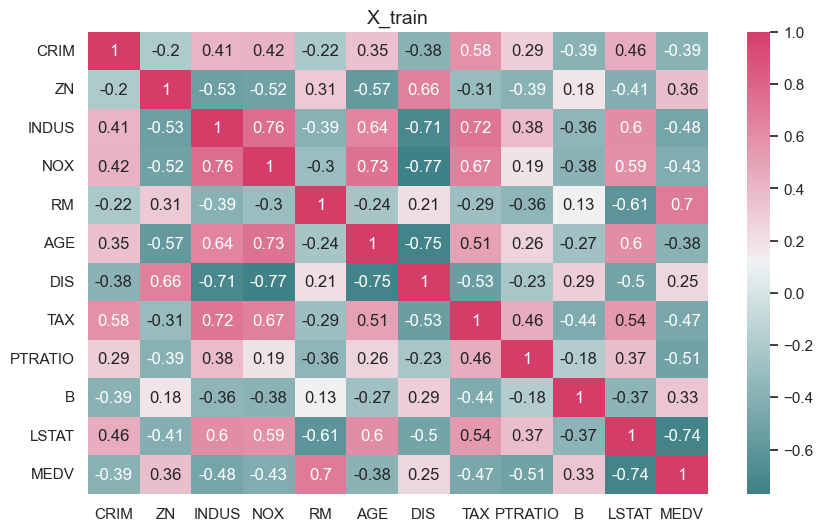

In [370]:
corr = bostonHousingData.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap=cmap)
sns.set_theme(style="whitegrid")
sns.color_palette("rocket_r", as_cmap=True)
plt.title('X_train', fontsize=14)
plt.show()

* **Para sacar conclusiones, hay que saber que** :
    - En la época de la encuesta aún había mucho diesel en Estados Unidos y los vehículos eran grandes y de altísimo consumo 
    - No hay restricciones sobre la circulación y los trailers podían y pueden entrar encualquier calle de cualquier barrio, sea residencial, comercial o industrial
    - Las casas hasta los años 50 se han edificado sobre las principales vías de las ciudades, mientras que a partir de los años 60-70, las zonas residenciales se han ido edificando en núcleos más alejados, buscando paz e intimidad y las grandes arterias se quedaron para los comercios, equipamientos, industrias o las grandes torres de pisos. 
    

* **Se observa una fuerte correlación positiva entre** :
    - "NOX" e "INDUS" : concentración de óxidos nítricos y proporción de acres de negocios no minoristas por ciudad, lo que indica que las zonas donde existen negocios no minoristas pueden estar más contaminadas por los gases que provienen de los vehículos, sobretodo de coches y camiones / traileres diesel (en la época de la encuesta aún había mucho diesel en Estados Unidos y los vehículos eran grandes y de altísimo consumo).
    - "NOX" y "TAX" : concentración de óxidos nítricos y porcentaje de impuesto a la propiedad sugiere que en las zonas más concurridas por los vehículos se pagan más impuestos por superfície
    - "INDUS" y "TAX" : a mayor proporción de acres de negocios no minoristas por ciudad, mayor porcentaje de impuesto a la propiedad (como en la observación anterior) 
    - "NOX" y "AGE" : concentración de óxidos nítricos y proporción de unidades de viviendas ocupadas por sus propietarios construidas antes de 1940 indica que donde las casas son más antiguas y en régimen de propiedad,es en las zonas más concurridas y a la vez, más contaminadas.
    - "ZN" y "DIS" : proporción de terreno residencial zonificado en lotes de más de 25,000 pies cuadrados (pueden ser bloques de pisos, o casas con grandes terrenos) y distancias ponderadas a cinco centros de empleo en Boston.
    
    
* **Se observa una fuerte correlación negativa entre** :
    - DIS y NOX : distancias ponderadas a cinco centros de empleo en Boston y concentración de óxidos nítricos, por lo que cuanto más alejadas están las viviendas de los centros de empleo, más calidad de aire disfrutan en sus casas ; cuanto más cerca, más NOX y peor calidad de aire
    - DIS y INDUS : distancias ponderadas a cinco centros de empleo en Boston y suelo industrial o de comercio mayorista viene a decir que cuando nos alejamos de los 5 centros de empleo de Boston, la proporción de parcelas grandes disminuye, pero que estando cerca de estos polos de empleo, nos encontramos muchas.
    - DIS y AGE : distancias ponderadas a cinco centros de empleo en Boston y propietarios viviendo en casas de antes del 1940 nos indica una parte importante de las casas antiguas y situadas cerca de los polos de empleo resultan interesantes para los porpietarios, o que a mucha gente le interesa vivir cerca de trabajo y servicios.
* **NO se observan correlaciones fuertes** entre RM (promedio de habitaciones por vivienda), PTRATIO (relación alumno-maestro por ciudad), LSTAT ( % de estatus socioeconómico bajo de la población) y las demás variables.
* Se observa que B (proporción de gente negra) está en muchos casos, incluso para la tasa criminal, en una correlación neutra o negativa con las otras variables.

* Dos variables se distinguen de las demás por ser categóricas e individibles. También, son de tipo Int64 mientras las otras son de tipo Float y son resultados de cálculos previos. Estas variables son :
* "CHAS" (Charles River dummy variable, que tiene 2 valores únicos binarios 0 y 1, según el contacto con el río de la ciudad.
* "RAD" (index of accessibility to radial highways) tiene 9 valores categóricos únicos por lo que más tarde, le podremos aplicar columnas Dummies, que convertirán sus datos en otras 9 columnas adicionales binarias según hagan parte de una categoría o no.
* Se les cambiará el tipo para que no aparezcan en los cálculos estadísticos.

In [292]:
bostonHousingData[['CHAS', 'RAD']] = bostonHousingData[['CHAS', 'RAD']].astype('category')

In [296]:
bostonHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [299]:
bostonHousingData['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [300]:
bostonHousingData['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

#### 1.b) **Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.**

**Importamos la función *train_test_split* de la librería *sklearn.model_selection* y preparamos el split:**

* **X=>"features"** (input) : usaremos todas las columnas menos la última,  es decir, es información sobre vivienda y las características de su entorno
* **y=>"target"** (output) : usaremos solamente la última columna, que es la del precio de las viviendas en miles de dólares

In [317]:
from sklearn.model_selection import train_test_split

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = ['MEDV']

X=bostonHousingData.loc[:, features]
y=bostonHousingData.loc[:, target]

print(X.shape, y.shape)

(506, 13) (506, 1)


In [318]:
display('__ X __:', X, '__ y __', y)

'__ X __:'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


'__ y __'

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


#### 1.c) **Realizamos la separación (split train - test) indicando las proporciones del conjunto que queremos entrenar o comprobar, que serán de 80% y 20%**

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [320]:
display('-----X_TRAIN ------------', X_train.head(5), '------X_TEST ------------', X_test.head(5))

'-----X_TRAIN ------------'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666.0,20.2,127.36,26.64


'------X_TEST ------------'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34


In [321]:
display(X_train.info(), X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 220 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     404 non-null    float64 
 1   ZN       404 non-null    float64 
 2   INDUS    404 non-null    float64 
 3   CHAS     404 non-null    category
 4   NOX      404 non-null    float64 
 5   RM       404 non-null    float64 
 6   AGE      404 non-null    float64 
 7   DIS      404 non-null    float64 
 8   RAD      404 non-null    category
 9   TAX      404 non-null    float64 
 10  PTRATIO  404 non-null    float64 
 11  B        404 non-null    float64 
 12  LSTAT    404 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 39.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 329 to 108
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     102 non-null    float64 
 1   ZN       102 non-null   

None

None

In [322]:
display('___X_TRAIN :___', train.nunique(), '___X_TEST :___', test.nunique())

'___X_TRAIN :___'

CRIM       402
ZN          26
INDUS       73
CHAS         2
NOX         80
RM         362
AGE        297
DIS        346
RAD          9
TAX         63
PTRATIO     44
B          289
LSTAT      369
MEDV       215
dtype: int64

'___X_TEST :___'

CRIM       102
ZN          15
INDUS       41
CHAS         2
NOX         53
RM          99
AGE         86
DIS         96
RAD          9
TAX         36
PTRATIO     30
B           74
LSTAT      102
MEDV        76
dtype: int64

In [326]:
display('____ X_TRAIN ____: ', X_train.describe().round(2).T, '____ X_TEST ____: ', X_test.describe().round(2).T)


'____ X_TRAIN ____: '

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.39,8.14,0.01,0.08,0.26,3.36,88.98
ZN,404.0,11.79,23.64,0.00,0.00,0.00,20.00,100.00
INDUS,404.0,11.12,6.99,0.46,5.13,9.12,18.10,27.74
NOX,404.0,0.56,0.12,0.38,0.45,0.54,0.63,0.87
RM,404.0,6.30,0.69,3.56,5.89,6.21,6.68,8.78
AGE,404.0,69.03,28.11,2.90,45.68,77.95,93.90,100.00
DIS,404.0,3.77,2.08,1.17,2.09,3.19,5.14,12.13
TAX,404.0,402.84,170.86,187.00,276.00,322.00,666.00,711.00
PTRATIO,404.0,18.46,2.19,12.60,17.40,19.10,20.20,22.00
B,404.0,358.79,88.66,0.32,376.13,391.60,396.06,396.90


'____ X_TEST ____: '

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,4.51,10.23,0.01,0.09,0.25,5.18,73.53
ZN,102.0,9.66,22.06,0.00,0.00,0.00,0.00,85.00
INDUS,102.0,11.19,6.34,0.74,5.88,9.90,18.10,21.89
NOX,102.0,0.55,0.12,0.39,0.45,0.52,0.60,0.87
RM,102.0,6.22,0.73,3.86,5.88,6.16,6.47,8.72
AGE,102.0,66.78,28.38,8.40,39.62,72.55,95.20,100.00
DIS,102.0,3.89,2.21,1.13,2.14,3.35,5.19,10.71
TAX,102.0,429.60,158.01,224.00,304.00,384.00,666.00,666.00
PTRATIO,102.0,18.43,2.05,12.60,16.90,18.70,20.20,21.20
B,102.0,348.31,101.09,2.60,366.76,390.68,396.90,396.90


**Hacemos un heatmap para ver las correlaciones entre los atributos de X_train y de X_test**

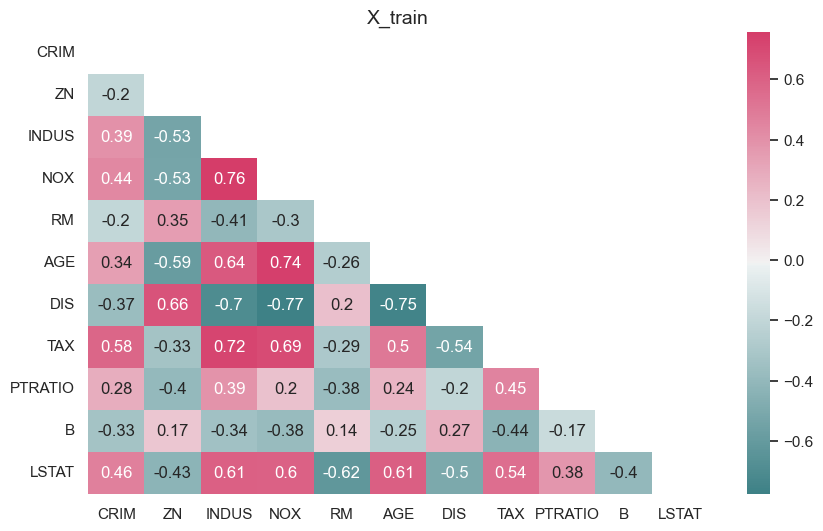

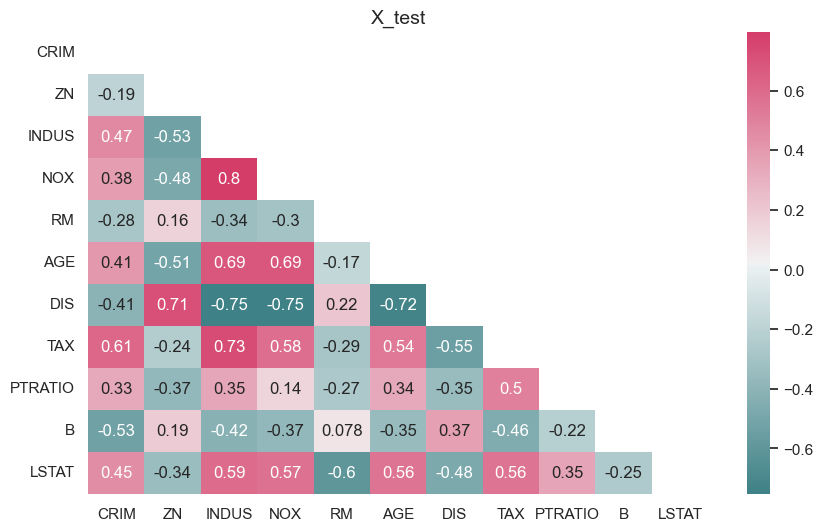

In [371]:
corr = X_train.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
sns.set_theme(style="whitegrid")
sns.color_palette("rocket_r", as_cmap=True)
plt.title('X_train', fontsize=14)
plt.show()

corr = X_test.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
sns.set_theme(style="whitegrid")
sns.color_palette("rocket_r", as_cmap=True)
plt.title('X_test', fontsize=14)
plt.show()

**Los gráficos de tipo Boxplot mostrarán las medias y los outliers de cada atributo**

* Podemos ver que aunque las cifras no son idénticas del X_train y el X_test, en la mayoría y donde es importante, son parecidas 

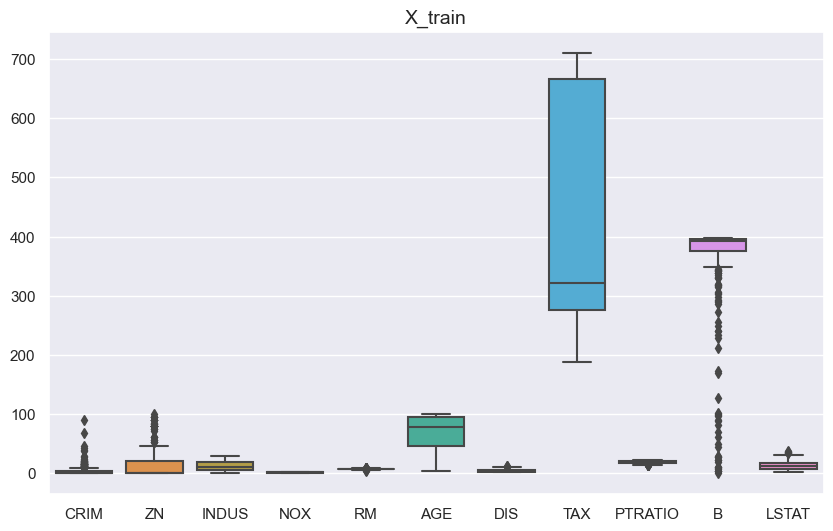

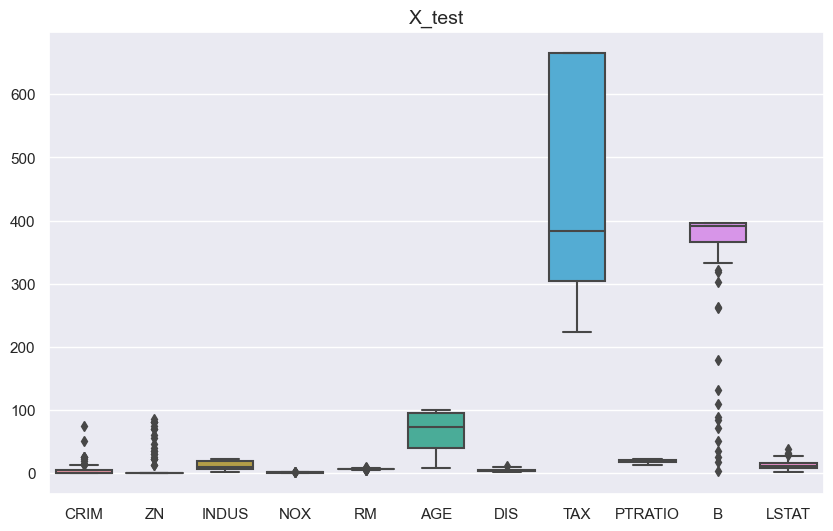

In [367]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(data=X_train)
plt.title('X_train', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(data=X_test)
plt.title('X_test', fontsize=14)
plt.show()

* los gráficos anteriores mostraron que las tendencias de las variables son parecidas en ambos casos, con algunas diferencias en los outliers de "ZN" (parceloas de viviendas mayores de 25.000 pi2) y de "B" (proporción afroamericanos).


## Exercici 2
#### **Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).** 


* Para saber si hay que estandardizar, normalizar o no las variables, hay que verificar primero cuáles ya son normales y cuáles no. 
* Para ello applicamos el test de Shapiro-Wilk a cada variable de los datasets X_train e X_test.
* Se mirará también de quitar datos que se salen de la normalidad.


#### 2.a) Aplicamos el test de normalidad Shapiro-Wilk a las variables

Estipulación :

* Hipótesis nula (H0): la variables **sí tienen** una distribución Gaussiana normal
* Hipótesis H1: la variables **NO tienen** una distribución Gaussiana normal.

In [325]:
# aplicar Shapiro a X_train
from scipy.stats import shapiro

for i in X_train:
    
    stat, p = shapiro(X_train[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'{i} ---> tiene una distribución gaussiana (normal). No se puede rechazar la hipótesis nula H0.\n')
    else: 
         print(f'{i} ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.\n')

stat=0.443, p=0.000
CRIM ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.567, p=0.000
ZN ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.900, p=0.000
INDUS ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.275, p=0.000
CHAS ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.941, p=0.000
NOX ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.972, p=0.000
RM ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.888, p=0.000
AGE ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.900, p=0.000
DIS ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.675, p=0.000
RAD ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.813, p=0.000
TAX ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.900, p=0.00

Conclusión : Ninguna variable del **X_train** tiene una distribución normalizada según el Test de Shapiro-Wilk y tenemos que **rechazar la Hipótesis nula**

In [346]:
for i in X_test:
    
    stat, p = shapiro(X_test[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'{i} ---> tiene una distribución gaussiana (normal). No se puede rechazar la hipótesis nula H0.\n')
    else: 
         print(f'{i} ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.\n')

stat=0.481, p=0.000
CRIM ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.500, p=0.000
ZN ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.883, p=0.000
INDUS ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.274, p=0.000
CHAS ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.907, p=0.000
NOX ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.893, p=0.000
RM ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.901, p=0.000
AGE ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.911, p=0.000
DIS ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.696, p=0.000
RAD ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.797, p=0.000
TAX ---> **NO TIENE** una distribución gaussiana. Se rechaza hipótesis nula.

stat=0.910, p=0.00

Conclusión :Ninguna variable del **X_test** tiene una distribución normalizada según el Test de Shapiro-Wilk y tenemos que **rechazar la Hipótesis nula**

#### 2.b) Creación de columnas dummies:

* Como vimos antes, la variable categórica CHAS es una variable binaria
* Para la variable categórica RAD se usará OneHotEncoder

In [376]:
encoder = OneHotEncoder()

# Nuevas columnas :
features_encoder = ['CHAS','CHAS1','RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24']

# Ajustarse a los datos de entrenamiento
encoder.fit(X_train[['CHAS','RAD']])

# Transformar los datos para el entrenamiento
transformed_train = encoder.transform(X_train[['CHAS','RAD']]).toarray()

# Nuevo DataFrame
X_train_encoder = pd.DataFrame(transformed_train, columns = features_encoder)
X_train_encoder.head()

,CHAS,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [379]:
encoder = OneHotEncoder()

features_encoder = ['CHAS','CHAS1','RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24']

# Ajustarse a los datos de entrenamiento
encoder.fit(X_test[['CHAS','RAD']])

# Transformar los datos para el entrenamiento
transformed_test_encoder = encoder.transform(X_test[['CHAS','RAD']]).toarray()

# Nuevo DataFrame
X_test_encoder = pd.DataFrame(transformed_test_encoder, columns = features_encoder)
X_test_encoder.head()

,CHAS,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


* Como vimos en los gráficos de la parte anterior, hay variables que tienen outliers
* Se le tiene que aplicar una estandarización, como por ejemplo con RobustScaler

In [417]:
scaler = RobustScaler()

features_scaler = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

# Ajustarse a los datos de entrenamiento
scaler.fit(X_train[features_scaler])

# Transformar los datos de entrenamiento
transformed_train_scaler = scaler.transform(X_train[features_scaler])

# Nuevo DataFrame
X_train_scaler = pd.DataFrame(transformed_train_scaler, columns=features_scaler)
X_train_scaler

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,0.030966,0.000,0.939981,-0.107824,-0.607143,0.005018,-0.153105
1,-0.029798,0.000,-0.317561,0.686518,0.035714,-0.735667,-0.136736
2,-0.043659,1.500,0.871388,1.029981,-0.892857,-0.017564,0.007703
3,-0.051280,0.625,-0.252779,0.775986,-1.392857,0.200728,0.108811
4,7.829507,0.000,-1.152112,-0.505453,0.392857,-13.260068,1.477130
...,...,...,...,...,...,...,...
399,0.008356,0.000,-0.638933,0.501097,0.178571,-0.023585,0.042369
400,-0.051783,2.250,1.228326,1.077040,-1.392857,-0.055702,-0.811748
401,-0.032170,0.000,-0.241346,-0.145255,-0.464286,0.146029,-0.096293
402,-0.008304,0.000,-0.229914,0.818198,-0.428571,0.057207,0.722195


In [416]:
scaler = RobustScaler()

features_scaler = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

# Ajustarse a los datos de entrenamiento
scaler.fit(X_test[features_scaler])

# Transformar los datos de entrenamiento
transformed_test_scaler = scaler.transform(X_test[features_scaler])

# Nuevo DataFrame
X_test_scaler = pd.DataFrame(transformed_test_scaler, columns=features_scaler)
X_test_scaler

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.035754,0.0,0.299320,0.612049,-0.545455,-0.513186,-0.548356
1,1.766763,0.0,0.100340,-0.714095,0.454545,-0.813734,-0.263106
2,-0.026509,0.0,0.367347,0.005179,-0.696970,0.101509,-0.136763
3,4.828839,0.0,-1.374150,-0.539144,0.454545,0.206336,1.070661
4,-0.037874,0.0,0.127551,0.546323,0.000000,-0.141980,0.102898
...,...,...,...,...,...,...,...
97,-0.044937,85.0,0.384354,1.914426,-0.424242,0.206336,-0.752849
98,0.885683,0.0,0.625850,-0.298862,0.454545,-11.270858,0.857050
99,-0.019611,25.0,-0.707483,1.271203,0.303030,0.146956,0.208401
100,-0.021342,0.0,0.370748,0.195996,-0.030303,-0.161552,-0.282644


* Se aplica un escalado al resto de variables utilizando MinMaxScaler :

In [385]:
scaler = MinMaxScaler()
features_scaler = ['INDUS', 'NOX', 'AGE', 'TAX']

# Ajustar el scaler a los datos de entrenamiento
scaler.fit(X_train[features_scaler])

# Transformar los datos de entrenamiento
transformed_train_minmax = scaler.transform(X_train[features_scaler])

# Creamos un nuevo DataFrame
X_train_minmax = pd.DataFrame(transformed_train_minmax, columns=features_scaler)
X_train_minmax.head()

,INDUS,NOX,AGE,TAX
0,0.210411,0.251029,0.881565,0.229008
1,0.379399,0.057613,0.150360,0.225191
2,0.163856,0.088477,0.529351,0.215649
3,0.271628,0.286008,0.656025,0.236641
4,0.646628,0.604938,0.887745,0.914122


In [409]:
scaler = MinMaxScaler()
features_scaler = ['INDUS', 'NOX', 'AGE', 'TAX']

# Ajustar el scaler a los datos de entrenamiento
scaler.fit(X_test[features_scaler])

# Transformar los datos de entrenamiento
transformed_test_minmax = scaler.transform(X_test[features_scaler])

# Creamos un nuevo DataFrame
X_test_minmax = pd.DataFrame(transformed_test_minmax, columns=features_scaler)
X_test_minmax.head()

,INDUS,NOX,AGE,TAX
0,0.118203,0.141962,0.096070,0.466063
1,0.820804,0.498956,1.000000,1.000000
2,0.621749,0.329854,0.917031,0.117647
3,0.820804,0.628392,0.956332,1.000000
4,0.571631,0.093946,0.494541,0.393665


**Con las columnas modificadas hacemos los dataframes finales**

In [410]:
X_train_final = pd.concat([X_train_scaler, X_train_minmax, X_train_encoder], axis=1)
X_train_final

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,...,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,0.030966,0.000,0.939981,-0.107824,-0.607143,0.005018,-0.153105,0.210411,0.251029,0.881565,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.029798,0.000,-0.317561,0.686518,0.035714,-0.735667,-0.136736,0.379399,0.057613,0.150360,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.043659,1.500,0.871388,1.029981,-0.892857,-0.017564,0.007703,0.163856,0.088477,0.529351,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.051280,0.625,-0.252779,0.775986,-1.392857,0.200728,0.108811,0.271628,0.286008,0.656025,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,7.829507,0.000,-1.152112,-0.505453,0.392857,-13.260068,1.477130,0.646628,0.604938,0.887745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.008356,0.000,-0.638933,0.501097,0.178571,-0.023585,0.042369,0.253666,0.222222,0.735324,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
400,-0.051783,2.250,1.228326,1.077040,-1.392857,-0.055702,-0.811748,0.109238,0.106996,0.240989,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
401,-0.032170,0.000,-0.241346,-0.145255,-0.464286,0.146029,-0.096293,0.350073,0.333333,0.820803,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
402,-0.008304,0.000,-0.229914,0.818198,-0.428571,0.057207,0.722195,0.236437,0.129630,0.850669,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [411]:
X_test_final = pd.concat([X_test_scaler, X_test_minmax, X_test_encoder], axis=1)
X_test_final

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,...,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,-0.035754,0.0,0.299320,0.612049,-0.545455,-0.513186,-0.548356,0.118203,0.141962,0.096070,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.766763,0.0,0.100340,-0.714095,0.454545,-0.813734,-0.263106,0.820804,0.498956,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.026509,0.0,0.367347,0.005179,-0.696970,0.101509,-0.136763,0.621749,0.329854,0.917031,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.828839,0.0,-1.374150,-0.539144,0.454545,0.206336,1.070661,0.820804,0.628392,0.956332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.037874,0.0,0.127551,0.546323,0.000000,-0.141980,0.102898,0.571631,0.093946,0.494541,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.044937,85.0,0.384354,1.914426,-0.424242,0.206336,-0.752849,0.000000,0.037578,0.298035,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.885683,0.0,0.625850,-0.298862,0.454545,-11.270858,0.857050,0.820804,0.670146,0.852620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99,-0.019611,25.0,-0.707483,1.271203,0.303030,0.146956,0.208401,0.207565,0.127349,0.631004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100,-0.021342,0.0,0.370748,0.195996,-0.030303,-0.161552,-0.282644,0.465721,0.202505,0.260917,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0



## Exercici 3
#### **Resumeix les noves columnes generades de manera estadística i gràfica** 


In [412]:
display(X_train_final.info(), X_test_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   RM       404 non-null    float64
 3   DIS      404 non-null    float64
 4   PTRATIO  404 non-null    float64
 5   B        404 non-null    float64
 6   LSTAT    404 non-null    float64
 7   INDUS    404 non-null    float64
 8   NOX      404 non-null    float64
 9   AGE      404 non-null    float64
 10  TAX      404 non-null    float64
 11  CHAS     404 non-null    float64
 12  CHAS1    404 non-null    float64
 13  RAD1     404 non-null    float64
 14  RAD2     404 non-null    float64
 15  RAD3     404 non-null    float64
 16  RAD4     404 non-null    float64
 17  RAD5     404 non-null    float64
 18  RAD6     404 non-null    float64
 19  RAD7     404 non-null    float64
 20  RAD8     404 non-null    float64
 21  RAD24    404 non

None

None

In [413]:
display(X_train_final.describe().T, X_test_final.describe().T)

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,0.954089,2.480761,-0.076268,-0.054132,-8.456777e-18,0.945868,27.045202
ZN,404.0,0.589728,1.181845,0.000000,0.000000,0.000000e+00,1.000000,5.000000
RM,404.0,0.115334,0.882429,-3.366148,-0.410607,0.000000e+00,0.589393,3.263258
DIS,404.0,0.189708,0.681354,-0.660450,-0.361238,0.000000e+00,0.638762,2.926235
PTRATIO,404.0,-0.227723,0.783865,-2.321429,-0.607143,0.000000e+00,0.392857,1.035714
B,404.0,-1.646697,4.449301,-19.635178,-0.776189,-1.425943e-15,0.223811,0.265964
LSTAT,404.0,0.135406,0.702844,-0.921521,-0.440299,-8.543513e-17,0.559701,2.472797
INDUS,404.0,0.390889,0.256342,0.000000,0.171188,3.176320e-01,0.646628,1.000000
NOX,404.0,0.351617,0.237038,0.000000,0.131687,3.148148e-01,0.506173,1.000000
AGE,404.0,0.681022,0.289464,0.000000,0.440525,7.729145e-01,0.937178,1.000000


,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,0.838686,2.012028,-0.046304,-0.030469,0.000000e+00,0.969531,14.413171
ZN,102.0,9.656863,22.061680,0.000000,0.000000,0.000000e+00,0.000000,85.000000
RM,102.0,0.101457,1.246148,-3.901361,-0.469388,0.000000e+00,0.530612,4.367347
DIS,102.0,0.178909,0.724552,-0.727043,-0.397310,0.000000e+00,0.602690,2.413578
PTRATIO,102.0,-0.082294,0.621969,-1.848485,-0.545455,0.000000e+00,0.454545,0.757576
B,102.0,-1.405501,3.353315,-12.873777,-0.793664,0.000000e+00,0.206336,0.206336
LSTAT,102.0,0.116268,0.847550,-1.254315,-0.458808,-1.162265e-16,0.541192,3.441224
INDUS,102.0,0.494071,0.299758,0.000000,0.243262,4.330969e-01,0.820804,1.000000
NOX,102.0,0.329811,0.248397,0.000000,0.116910,2.672234e-01,0.444676,1.000000
AGE,102.0,0.637373,0.309850,0.000000,0.340884,7.003275e-01,0.947598,1.000000


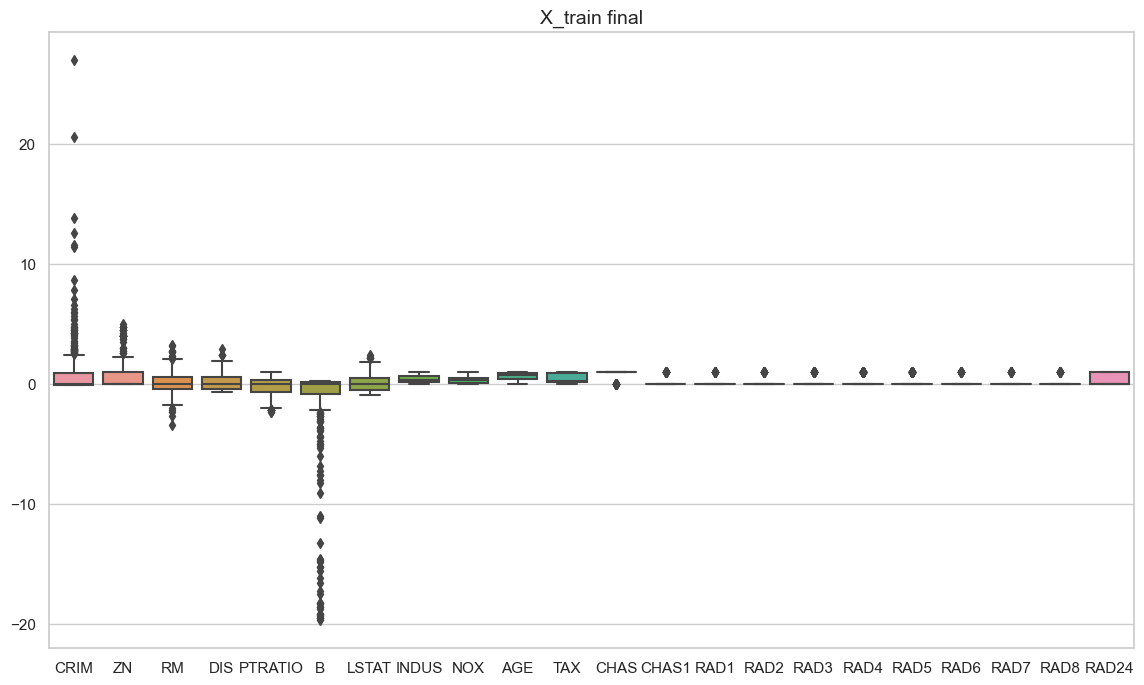

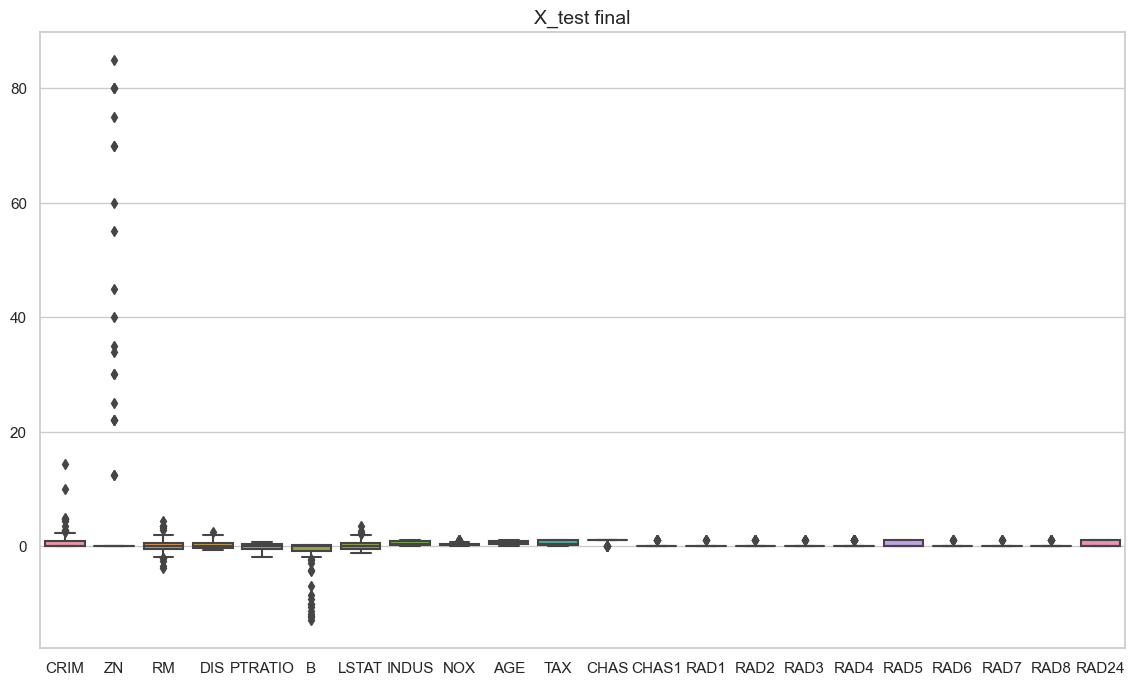

In [415]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(data=X_train_final)
plt.title('X_train final', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(data=X_test_final)
plt.title('X_test final', fontsize=14)
plt.show()

* Vemos que para la mayoría de variables, los dataframes de train y test tienen un comportamiento similar, menos para las variables "CRIM", "ZN" y "B" donde hay más y valores "outliers" en un dataframe que en el otro.